# **PRÁCTICA 1 OPTICA III**

**JULIO DAVID RUIZ MENDOZA 23958366W** 




---


 1 . La convolución de una señal discreta en el tiempo, $x $ , con una función impulso-respuesta también discreta, $h $ , se define como 

$$ y[n] = h[n]*x[n] = 
\sum_{k = -\infty}^\infty x[k] h[n-k]] $$

Se pide escribir el código para calcular $y[n] $  de tres formas distintas, utilizando como demostración cuatro valores para la señal y nueve para la función de impulso-respuesta.

 1.1.La primera forma es utilizando la función conv de la librería NumPy (Python) y servirá para comprobar los resultados de los otros dos métodos que se describen a continuación.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<BarContainer object of 6 artists>

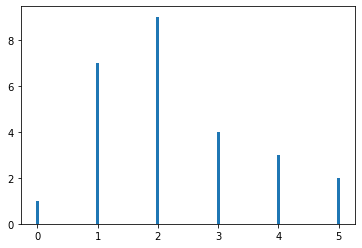

In [19]:
#valores de x y h
ceros = np.zeros(5)
x = np.array([1,7,9,4,3,2])#; x = np.append(np.append(ceros, x0) , ceros)
h = np.array([5,4,3,2,1])#; h = np.append(np.append(ceros, h0) , ceros)

plt.bar(np.arange(0,len(x)),x, width =0.05)

<BarContainer object of 5 artists>

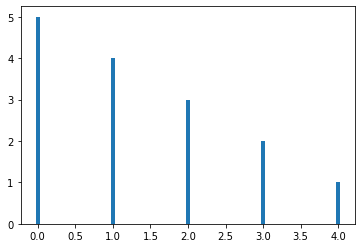

In [20]:
plt.bar(np.arange(0,len(h)),h, width =0.05)

<BarContainer object of 10 artists>

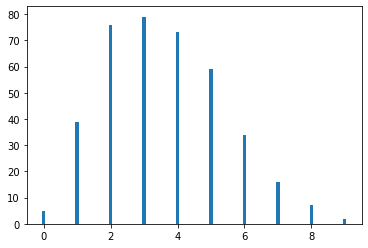

In [21]:
y = np.convolve(x,h)
t = np.arange(0,len(y))
t
plt.bar(t,y, width =0.1)


1.2.El segundo método consiste en aplicar directamente la definición
$y[n] = ··· + x[−1]h[n + 1] + x[0]h[n] + x[1]h[n − 1] + x[2]h[n − 2] + ··· $

<BarContainer object of 11 artists>

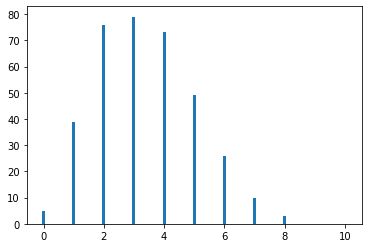

In [22]:
leny = len(x)+len(h)
y2 = (np.zeros(leny))
#x2 = np.append(x,np.zeros(len(h)))
#h2 = np.append(h,np.zeros(len(h)))


for n in range(0,leny):
    s=0
    for k in range(0,h.size):
        if n-k >= 0 and n-k <= h.size-1:
            y2[n] = x[k] * h[n-k] + s
            s= y2[n]

t2 = np.arange(0,leny)
plt.bar(t2,y2, width =0.1)

1.3.El tercer método se basa en que, para cada valor del índice temporal , la señal de
salida se puede obtener multiplicando la señal de entrada por la función de
impulso-respuesta invertida en el tiempo, desplazada incrementos y sumando todos
los valores resultantes , es decir 
$⋯\\
y[−1] = \sum x[k]h[−1 − k]\\
y[0] = \sum x[k]h[0 − k]\\
y[1] = \sum x[k]h[1 − k]\\
…$

In [23]:
# time_reversal
def time_reversal(x):
    ind = np.arange(x.size-1,-1,-1) 
    x_r=x[ind] 
    return x_r 

# time_shift 
def time_shift(x,s): 
     
    X=x.size 
    if s>=0:
         x_ts=np.concatenate( (np.zeros(s),x[0:X-s]), 0) 
    else:          
         s=-s
         x_ts=np.concatenate( (x[s:X],np.zeros(s)), 0)
     
    return x_ts 

<BarContainer object of 11 artists>

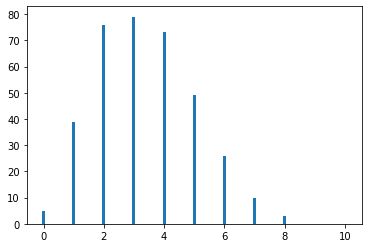

In [24]:
leny=x.size+h.size
y3 = (np.zeros(leny))

for n in np.arange(y3.size):
    hshift = time_shift(time_reversal(h), x.size-n)
    for k in np.arange(h.size):
        y3[n] = y3[n] + hshift[k]*x[k]
        
y3 = time_reversal(y3)
t3 = np.arange(0,leny)
plt.bar(t3,y3, width =0.1)

2.Considerando ahora funciones analíticas en lugar de listas de datos, utilizar la estrategia del
método 2 del apartado anterior para encontrar la función analítica que representa la
convolución de la señal con la función impulso respuesta
 de las figuras siguientes
Representar gráficamente .
y(t) = ∫x(τ)h(t − τ)dτ 


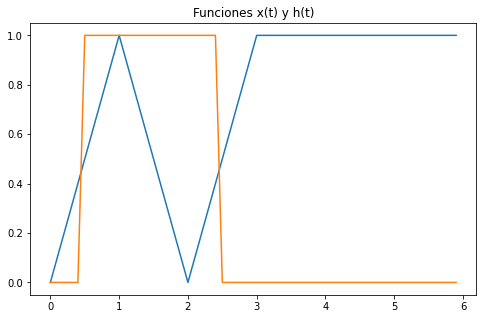

In [32]:

#Unimos las funciones por trozos



#tx0 = np.arange(-3,0, 0.01)
tx1 = np.arange(0,1, 0.1)
tx2 = np.arange(1,2, 0.1)
tx3 = np.arange(2,3, 0.1)
tx4 = np.arange(3,6, 0.1)

#x0= np.zeros(tx0.size)
x1 = tx1
x2 = -tx2+2
x3 = tx3-2
x4 = np.ones(tx4.size)

tx = np.concatenate((tx1,tx2,tx3,tx4))
x = np.concatenate((x1,x2,x3,x4))



th1 = np.arange(0,0.5, 0.1)
th2 = np.arange(0.5,2.5, 0.1)
th3 = np.arange(2.5, 6, 0.1)

h1 = np.zeros(th1.size)
h2 = np.ones(th2.size)
h3 = np.zeros(th3.size)

th = np.concatenate((th1,th2,th3))
h = np.concatenate((h1,h2,h3))



plt.figure(figsize = (8,5))
plt.plot(tx,x);plt.plot(th, h)
plt.title("Funciones x(t) y h(t)")
plt.show()


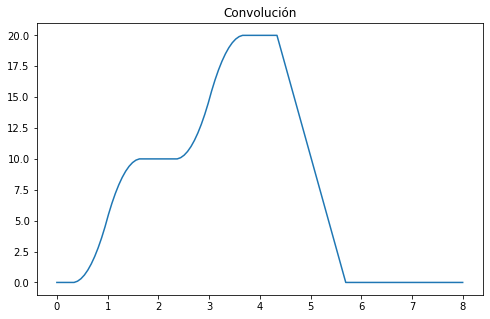

In [39]:

y = np.convolve(x, h)

plt.figure(figsize = (8,5))
plt.plot(np.linspace(0,8,len(y)),y)
plt.title("Convolución")
plt.show()

Si la función x siguise valiendo 1 hasta el infinito la convolución en la parte de la derecha no disminuiría.